# Preprocessing

In [1]:
# math and data packages
import pandas as pd
import numpy as np
import math

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

## Import data

Fix any known formatting problems here

In [2]:
# make slugs for species and places

# function to make the species slugs
def to_slug(x):
    try: 
        int_data = x.strip().split()
        data = int_data[:2]
        data = "-".join(data)
        data = data.lower()
    except:
        data = "none"
    return data

survey_data = pd.read_csv("resources/surveys.csv")
a, b = pd.read_csv("resources/data-2021-1.csv"), pd.read_csv("resources/data-2021-2.csv", encoding = "UTF-16")
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   place   935 non-null    object
 1   date    935 non-null    object
 2   time    756 non-null    object
 3   sci     935 non-null    object
 4   name    671 non-null    object
dtypes: object(5)
memory usage: 36.6+ KB


In [3]:
a["date"].head()

0    03.04.21
1    03.04.21
2    03.04.21
3    03.04.21
4    03.04.21
Name: date, dtype: object

In [4]:
# standardize the date column in the 2021 data

In [5]:
a["adate"] = a["date"].astype(str)
a["date"] = a["adate"].map(lambda x: f"20{x[-2:]}-{x[3:5]}-{x[:2]}")
a = a[~(a['date'] == "20an--na")]

b["adate"] = b["date"].map(lambda x: x[:8])
b["date"] =  b["adate"].map(lambda x: f"20{x[-2:]}-{x[0:2]}-{x[3:5]}")
b["date"].head()

0    2021-06-27
1    2021-06-27
2    2021-06-27
3    2021-06-27
4    2021-06-27
Name: date, dtype: object

In [6]:
a.head()

,date,place,feature,number,species,quantity,confidence,no_flowers,notes,Full-place-name,adate
0,2021-04-03,zukunftstrasse,box,1,Viburnum farreri,2,2.0,NaN,NaN,zukunftstrasse-box-1,03.04.21
1,2021-04-03,zukunftstrasse,box,1,Quercus suber,1,1.0,NaN,NaN,zukunftstrasse-box-1,03.04.21
2,2021-04-03,zukunftstrasse,box,1,Prunus avium,1,0.0,NaN,NaN,zukunftstrasse-box-1,03.04.21
3,2021-04-03,zukunftstrasse,box,2,Viburnum farreri,2,2.0,NaN,NaN,zukunftstrasse-box-2,03.04.21
4,2021-04-03,zukunftstrasse,box,2,Quercus suber,1,1.0,NaN,NaN,zukunftstrasse-box-2,03.04.21


In [7]:
#combine the three place name columns in the first 2021 dataset into one column, rename to match
#convention in other data sets
a["locname"] = a["place"]
a['place']=a.apply(lambda x:'%s-%s-%s' % (x['locname'],x['feature'], x["number"]),axis=1)

In [8]:
b["date"].min()

'2021-03-23'

In [9]:
a["date"].min()

'2021-02-01'

In [10]:
#create a "species" column for all three data sets.
survey_data.rename(columns={"sci":"species"}, inplace=True)
survey_data['loc_date'] = list(zip(survey_data.place, survey_data['date']))
b["species"] = b["taxon.taxon_name"]

In [11]:
b.head()

,obs_id,date,taxon.taxon_name,place,taxon.no_isfs,taxon_orig,taxon_expert,determinavit_cf,determinavit,introduced,...,supplements.depth_min,supplements.depth_max,supplements.sexe,supplements.releve_stratum,supplements.cover_abs,supplements.cat_aggregation,supplements.substrate,last_modified_when,adate,species
0,10902042.0,2021-06-27,Lapsana communis L.,Schneidergaessli-area-1,226900.0,Lapsana communis,O,-,NaN,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/12/21 05:09 PM,06/27/21,Lapsana communis L.
1,10902041.0,2021-06-27,Medicago sativa L.,Schneidergaessli-area-1,256000.0,Medicago sativa,O,-,NaN,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/12/21 05:09 PM,06/27/21,Medicago sativa L.
2,10902040.0,2021-06-27,Geranium pyrenaicum Burm. f.,Schneidergaessli-area-1,188600.0,Geranium pyrenaicum,O,-,NaN,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/12/21 05:09 PM,06/27/21,Geranium pyrenaicum Burm. f.
3,10902039.0,2021-06-27,Trifolium repens L.,Schneidergaessli-area-1,427100.0,Trifolium repens,O,-,NaN,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/12/21 05:09 PM,06/27/21,Trifolium repens L.
4,10902038.0,2021-06-27,Lotus corniculatus aggr.,Schneidergaessli-area-1,244410.0,Lotus corniculatus aggr.,O,-,NaN,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/12/21 05:09 PM,06/27/21,Lotus corniculatus aggr.


In [12]:
# set the year to 2 for 2021 observations, year to 1 for 2020 observations
a["year"]=2
b["year"] =2
survey_data["year"]=1

In [13]:
bcolumns = ["date", "place", "species", "year"]

In [14]:
c = pd.concat([survey_data[bcolumns], a[bcolumns], b[bcolumns]])

In [15]:
c.head()

,date,place,species,year
0,2020-09-02,alleestrasse 1,plantago lanceolata,1
1,2020-09-02,alleestrasse 1,centaurea nigra,1
2,2020-09-02,alleestrasse 1,plantago media,1
3,2020-09-02,alleestrasse 1,chenopodium album agg.,1
4,2020-09-02,alleestrasse 1,centaurea jacea agg.,1


In [16]:
c["loc_date"], a["loc_date"], b["loc_date"] = list(zip(c.place, c["date"])), list(zip(a.place, a["date"])), list(zip(b.place, b["date"]))

c["acopy"] = c.species

c["species"] = c.acopy.map(lambda x: to_slug(x))

c.head()   

,date,place,species,year,loc_date,acopy
0,2020-09-02,alleestrasse 1,plantago-lanceolata,1,"(alleestrasse 1, 2020-09-02)",plantago lanceolata
1,2020-09-02,alleestrasse 1,centaurea-nigra,1,"(alleestrasse 1, 2020-09-02)",centaurea nigra
2,2020-09-02,alleestrasse 1,plantago-media,1,"(alleestrasse 1, 2020-09-02)",plantago media
3,2020-09-02,alleestrasse 1,chenopodium-album,1,"(alleestrasse 1, 2020-09-02)",chenopodium album agg.
4,2020-09-02,alleestrasse 1,centaurea-jacea,1,"(alleestrasse 1, 2020-09-02)",centaurea jacea agg.


In [17]:
print(c.loc_date.nunique(), (a.loc_date.nunique() + b.loc_date.nunique()), survey_data.loc_date.nunique())

785 642 143


In [18]:
c.groupby("year").loc_date.nunique()

year
1    143
2    642
Name: loc_date, dtype: int64

In [19]:
print(c.place.nunique(), (a.place.nunique() + b.place.nunique()), survey_data.place.nunique())

575 489 111


In [20]:
c.groupby("year").place.nunique()

year
1    111
2    464
Name: place, dtype: int64

In [21]:
def asplit(x):
    akey=x
    int_data = x.strip().split("-")
    return int_data, akey

def check_length(x):
    data = len(x[0])
    return data, x[0], x[1]

def new_data(data, suffixes, threecharacters, twocharacters):
    
    if data[0] == 1:        
        if data[1][0].endswith(suffixes):
            new_x = data[1][:-4]
        elif data[1][0].endswith(threecharacters):
            new_x = data[1][:-3]
        else:
            new_x = data[1][0]
    else:
        
        if data[1][1] in suffixes:
            new_x = data[1][0]
        elif data[1][1].endswith(threecharacters):
            new_x = data[1][0]
        elif data[1][1].endswith(twocharacters):
            new_x = data[1][0]
        else:
            new_x = "-".join(data[1])            
    
    return {data[2]:new_x}
            
# data = "-".join(data)           
intermediate = [asplit(x) for x in c.species.sort_values().unique()]

lengths = [check_length(x) for x in intermediate]

new_names = [new_data(x, ("cf.", "sp."), ("sp", "cf"), ("x")) for x in lengths]

re_names = {k:v for x in new_names for k,v in x.items()}

def replace_genus(x, key):
    return key[x]

In [22]:
c["newname"] = c.species.map(lambda x: replace_genus(x, re_names))
c["species"] = c.newname

c.drop(["newname", "acopy"], axis=1, inplace=True)
c = c.reset_index(drop=True)

c = c[~c.species.isin(["none"])]
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7986 entries, 0 to 7986
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      7986 non-null   object
 1   place     7986 non-null   object
 2   species   7986 non-null   object
 3   year      7986 non-null   int64 
 4   loc_date  7986 non-null   object
dtypes: int64(1), object(4)
memory usage: 374.3+ KB


In [23]:
print(c.species.nunique(),  len(set([to_slug(x) for x in survey_data.species.unique()])))

661 239


In [24]:
c.groupby("year").species.nunique()

year
1    239
2    586
Name: species, dtype: int64

In [25]:
c.to_csv("resources/inprocess/combined_survey_data.csv", index=False)

In [26]:
# n per static count of surveys locations and speicies
def nSurveys(data, query="species", args=[]):
    return data[data[query].isin(args)].loc_date.nunique()

def nLocation(data, species="species", genus_species=[]):
    return data[data[species].isin(genus_species)].place.nunique()

def nSpecies(data, place="place", places=[]):
    return data[data[place].isin(places)].species.nunique()

def total_sls(data):
    surveys = data.loc_date.nunique()
    locations = data.place.nunique()
    species = data.species.nunique()
    
    return {"surveys":surveys, "places":locations, "species":species}

c["date"] = pd.to_datetime(c["date"])
c["month"] = c["date"].dt.month
genus_species = c.species.unique()
places = c.place.unique()

x = c[c["place"].isin(places)].copy()

In [59]:
# location report:

# surveys per year per location:
def nSamplesPerYearPlace(data):
    return data.groupby(['year', 'place'], as_index=False).loc_date.nunique()

def nSpeciesPerSample(data):
    return data.groupby(["loc_date", "date", "place"], as_index=False).species.count()

def aSpeciesPerSample(data, species=[]):
    """The per sample data for a species
    """
    new_data = nSpeciesPerSample(data[data["species"].isin(species)])
    new_data.rename(columns={"species":species[0]}, inplace=True)
    return new_data

def speciesPlaceNsamps(data):
    return data.groupby(["species", "place"], as_index=False).loc_date.nunique()

def pivot_this(data, colnames, index, column, value):
    return data[colnames].pivot(index=index, columns=column, values=value).fillna(0)

def speciesPerLocation(data,colnames, index="species",columns="place",values="loc_date"):
    """Uses speciesPlaceNsamps to return a matrix of species and locations with value of
    number of times identified at that location
    """
    return pivot_this(data, colnames, index, columns, values)

def speciesPlace(species_data, soi):
    """Uses speciesPerlocation to report on one species"""
    return species_data.loc[soi, (species_data.loc[soi] > 0)]

# samples per year per location
samps_year = nSamplesPerYearPlace(x)
samps_year.head()

NameError: name 'x' is not defined

In [60]:
samps_year.loc_date.unique()

NameError: name 'samps_year' is not defined

In [61]:
# samples per year
samps_year.groupby("year").loc_date.sum()

NameError: name 'samps_year' is not defined

In [62]:
# n species per sample
aplot = nSpeciesPerSample(x)
aplot.head()

NameError: name 'x' is not defined

NameError: name 'aplot' is not defined

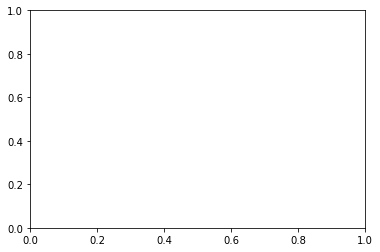

In [63]:
fig, ax=plt.subplots()
ax.scatter(x=pd.to_datetime(aplot["date"]), y=aplot.species, edgecolor="white")
ax.set_title("number of species per survey")
ax.tick_params(rotation=45)
plt.show()

In [64]:
colnames = ["species", "place", "loc_date"]
species_data = speciesPerLocation(speciesPlaceNsamps(x),colnames)
species_data.info()

NameError: name 'x' is not defined

In [65]:
# of times seen per location
species_data[species_data.columns[:10]].head()

NameError: name 'species_data' is not defined

In [66]:
# locations and number of times where a species was spotted
soi = "acer"
a_species_data = speciesPlace(species_data, soi)
a_species_data

NameError: name 'species_data' is not defined

In [67]:
# of times seen in total
species_data.sum(axis=1).head()

NameError: name 'species_data' is not defined

In [68]:
# of times it was seen relation to number of surveys
dtotals = total_sls(x)
s = species_data.sum(axis=1)/dtotals["surveys"]
s.sort_values(ascending=False)

NameError: name 'x' is not defined

In [69]:
# the persample data for a species
a_species_data = aSpeciesPerSample(x, species=["veronica-hederifolia"])

NameError: name 'x' is not defined

NameError: name 'a_species_data' is not defined

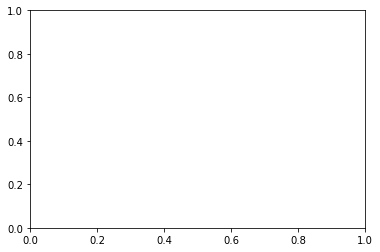

In [70]:
fig, ax=plt.subplots()
ax.scatter(x=pd.to_datetime(a_species_data["date"]), y=a_species_data["veronica-hederifolia"], edgecolor="white")
ax.set_title("veronica-hederifolia per survey")
ax.tick_params(rotation=45)
plt.show()

In [71]:
a_species_data.head()

NameError: name 'a_species_data' is not defined

## Determine wether or not a species was detected within a geographic limit

The territory is divided into different segments. Flora-helvitica and WS maps have different geographic bounds. Here the presence or not of a species within the confines of one of the different boundaries is determined.

### Key the species to the different maps it was identified in


## Format date column to ISO standard